© [Mariia Seleznova](https://www.ai.math.uni-muenchen.de/members/postdocs/mariia-seleznova/index.html), 2025. [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/).

# "Hello world" of data science: The Iris dataset

A typical Machine Learning pipeline has the following steps:
* **Step 1 - Load the data:** First, we need to load the data (e.g., from the internet or local files), and convert it into a suitable format. 
* **Step 2 - Visualize:** It is often useful (and fun) to visualize the data for the initial exploration.
* **Step 3 - Learn:** Choose an ML model suitable for your analysis goal and run a *learning* algorithm.
* **Step 4 - Evaluate:** Measure the performance of the final model (e.g., accuracy).

We will go through the steps of this pipeline using a well-known **Iris dataset**.

"The Iris flower data set or Fisher's Iris data set is a **multivariate data set** introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "*The use of multiple measurements in taxonomic problems*" as an example of linear discriminant analysis. The data set consists of 50 samples from each of **three species of Iris (Iris setosa, Iris virginica and Iris versicolor)**. **Four features** were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other." (c) [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

<img src="https://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg" alt="Iris setosa" width="200"/> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1920px-Iris_virginica.jpg" alt="Iris virginica" width="325"/> <img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" alt="Iris versicolor" width="355"/>

## Step 1: Load the Iris dataset

To start with any ML pipeline, you first need to load the data. Here we load the Iris dataset directly from a url using a Pandas library function.

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal length [cm]', 'sepal width [cm]', 'petal length [cm]', 'petal width [cm]', 'iris type']
df = pd.read_csv(url, names=names)

Have a quick look at the data.

In [2]:
df

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],iris type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Step 2: Visualize

You will often want to visualize your data or the output of your models to gain insights. Visualization can be a challenge of its own for practical high-dimensional datasets, which require advanced dimensionality reduction techniques.

For our Iris example, we will simply plot a 2d projection of our data as $(x_1, x_2)\in\mathbb R^2$ where:
* $x_1$ is the sepal length in cm and
* $x_2$ is the petal width in cm.



Text(0, 0.5, 'petal width [cm]')

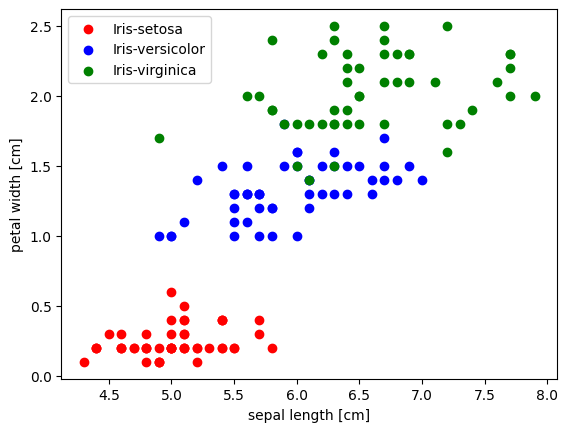

In [3]:
import matplotlib
import matplotlib.pyplot as plt

df_class = df[df['iris type'] == 'Iris-setosa']
plt.scatter(df_class['sepal length [cm]'], df_class['petal width [cm]'], c='red', label='Iris-setosa')

df_class = df[df['iris type'] == 'Iris-versicolor']
plt.scatter(df_class['sepal length [cm]'], df_class['petal width [cm]'], c='blue', label='Iris-versicolor')

df_class = df[df['iris type'] == 'Iris-virginica']
plt.scatter(df_class['sepal length [cm]'], df_class['petal width [cm]'], c='green', label='Iris-virginica')

plt.legend()
plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')

## Step 3: Learning

The most important part of an ML pipeline is to choose an appropriate **ML model** and a **learning algorithm**. Exploring a variety of classical ML settings and corresponding models is at the heart of this course. 

In the Iris dataset example we have the following:
* **Goal:** Classify the irises into 3 species.
* **Data type:** Multivariate dataset (i.e., a table of numbers), quantitative features, qualitative labels ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica').

Given the data analysis goal, it is clear that we are looking into **multiclass classification** models here. Since all the features are quantitative (numerical), we don't need to do any additional processing for them here - they are already easy to work with. However, the data labels are given as string values of species names, so we will replace them with integer values to make our life easier. 

In [4]:
df['class'] = df['iris type'].replace(
    ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
    [1, 2, 3])

/var/folders/9v/zb2h9_ys5yz0c88dl39lnxbh0000gn/T/ipykernel_77733/3395972872.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['iris type'].replace(


Usually, ML models are trained only on a part of the dataset called *train split* and the rest of the data -- called *test split* -- is left for evaluation. Here we split the data into train and test parts, with 30% of the samples left for testing.

For simplicity of visualization, we will also continue working with only two features out of four features of the data.

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df[['sepal length [cm]', 'petal width [cm]']].to_numpy()
Y = df['class'].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

print(f"Train split size: {X_train.shape[0]}")
print(f"Test split size: {X_test.shape[0]}")

Train split size: 105
Test split size: 45


We also visualize the results of our train-test split below.

Text(0, 0.5, 'petal width [cm]')

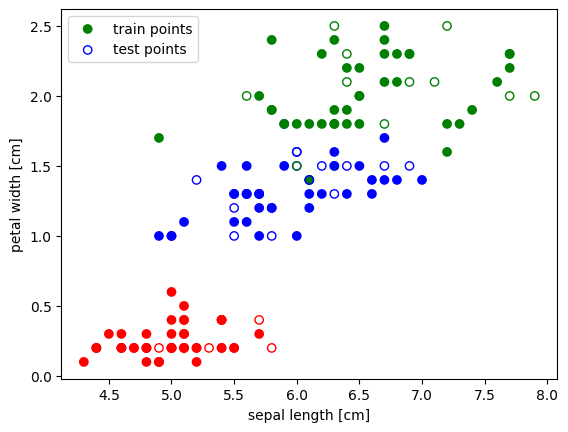

In [6]:
train_colors = np.select([Y_train==1, Y_train==2, Y_train==3],['red', 'blue', 'green'],'n/a')
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_colors,label='train points')

test_colors = np.select([Y_test==1, Y_test==2, Y_test==3],['red', 'blue', 'green'],'n/a')
plt.scatter(X_test[:, 0], X_test[:, 1], edgecolors=test_colors, facecolors='none', label='test points')

plt.legend()
plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')

Now we can train an ML model on the train data. We will try several classification models in this notebook.

### Example 1: Least squares regression
Least squares regression model solves the following optimization problem:

$$\min_w\mathcal{L}(X,Y,w) = \min_w \| Xw - Y\|_2^2,$$

where $X$ is the features of the dataset and $Y$ are the labels. In our case, $X\in\mathbb{R}^{105\times 2}$, $Y\in[1,2,3]^{105}$, since there are 105 samples in the train set, and two numerical features.

In this example, we do not implement any models from scratch, but use ready implementations from scikit-learn package. Later in the course, we will implement our models from scratch to get insight into challenges and decisions involved in setting up ML pipelines. 

In [7]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(alpha=0).fit(X_train, Y_train)

After training the model, let's visualize its results.

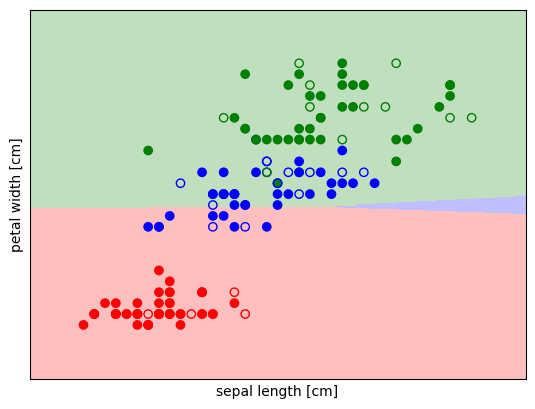

In [8]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.01  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

cMap = matplotlib.colors.ListedColormap(['red','blue','green'])
plt.pcolormesh(xx, yy, Z, alpha=0.25, cmap=cMap)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_colors)
plt.scatter(X_test[:, 0], X_test[:, 1], edgecolors=test_colors, facecolors='none')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Not very good!

## Step 4: Evaluate model's performance

We also want to evaluate the model's results numerically using some performance metrics. For classification, the standard metric is accuracy.

In [9]:
print('Train accuracy: ', clf.score(X_train,Y_train))
print('Test accuracy: ', clf.score(X_test,Y_test))

Train accuracy:  0.6761904761904762
Test accuracy:  0.6444444444444445


### Example 2: Logistic Regression

We can try a different linear model -- Logistic Regression. Here we have a different optimization problem:

 $$\min_w\mathcal{L}(X,Y,w) = \min_w \sum_{i=1}^n \log(\exp(-y_iX_i^Tw)+1)$$

In [10]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty=None,fit_intercept=False).fit(X_train, Y_train)

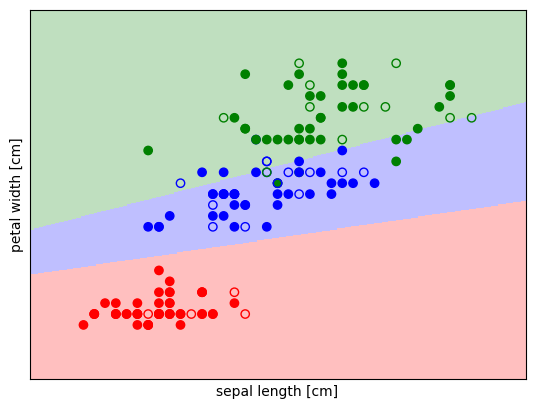

In [11]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

cMap = matplotlib.colors.ListedColormap(['red','blue','green'])
plt.pcolormesh(xx, yy, Z, alpha=0.25, cmap=cMap)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_colors)
plt.scatter(X_test[:, 0], X_test[:, 1], edgecolors=test_colors, facecolors='none')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Much better! We can also see that this method gives a much better accuracy.

In [12]:
print('Train accuracy: ', clf.score(X_train,Y_train))
print('Test accuracy: ', clf.score(X_test,Y_test))

Train accuracy:  0.9238095238095239
Test accuracy:  0.8888888888888888


### Example 3: SVM with RBF kernel

Clearly, our data is not linearly separable, i.e., we cannot get a perfect solution using any linear model. Therefore, we can try a non-linear model (SVM with RBF kernel) to get even better results.

In [13]:
from sklearn import svm

clf = svm.SVC(kernel='rbf', gamma=0.7, C=1.0).fit(X_train, Y_train)

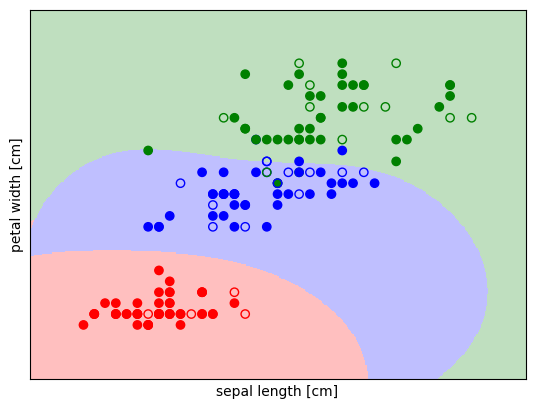

In [14]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

cMap = matplotlib.colors.ListedColormap(['red','blue','green'])
plt.pcolormesh(xx, yy, Z, alpha=0.25, cmap=cMap)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_colors)
plt.scatter(X_test[:, 0], X_test[:, 1], edgecolors=test_colors, facecolors='none')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal width [cm]')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

We see that this model fits the training set almost perfectly.

In [15]:
print('Train accuracy: ', clf.score(X_train,Y_train))
print('Test accuracy: ', clf.score(X_test,Y_test))

Train accuracy:  0.9428571428571428
Test accuracy:  0.9333333333333333


~The End~